# Lab3, Modelado Simulacion y optimización 
### Uniandes
##### Developed by:
## Diego Ortiz


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Problema 1


Implemente en Python los siguientes pasos para encontrar el mínimo o el máximo local de una función usando el método de Newton Raphson para dos dimensiones. 
Ayuda: use la librería sympy para definir la función, obtener y evaluar la primera y segunda derivada de la función en cuestión.

### Definicón y grafica de la función
$$
f(x) = 3x^3 - 10x^2 - 56x + 50
$$


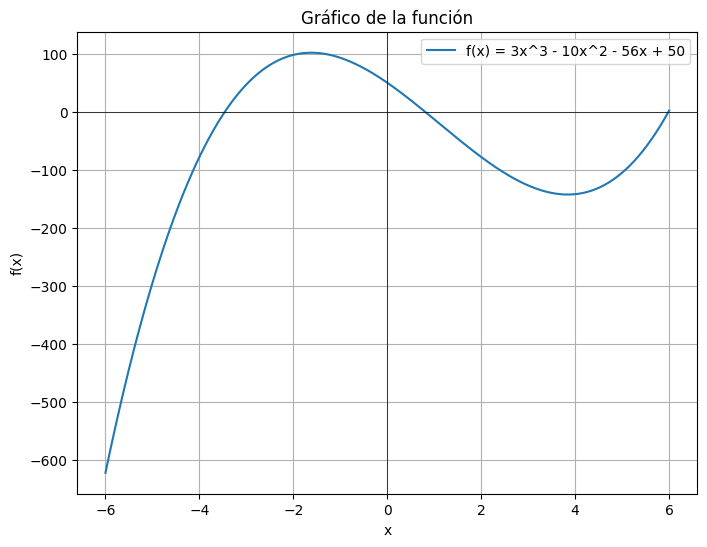

In [2]:
x = sp.symbols('x')

f = 3*x**3 - 10*x**2 - 56*x + 50

f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

f_lambdified = sp.lambdify(x, f, 'numpy')
X = np.linspace(-6, 6, 400)
Y = f_lambdified(X)

plt.figure(figsize=(8, 6))
plt.plot(X, Y, label='f(x) = 3x^3 - 10x^2 - 56x + 50')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Gráfico de la función')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Implementar el algoritmo de Newton-Raphson para funciones unidimensionales

In [6]:
def newton_raphson_1d(f, f_prime, f_double_prime, x0, alpha=1.0, tol=1e-3, max_iter=100):
    """
    Método de Newton-Raphson para optimizar una función 1D (buscar mínimos/máximos locales).
    Parámetros:
      - f: expresión de sympy de la función f(x) (no se usa directamente, se mantiene por contrato)
      - f_prime: primera derivada de f (sympy)
      - f_double_prime: segunda derivada de f (sympy)
      - x0: punto inicial (float o sympy)
      - alpha: tamaño de paso
      - tol: tolerancia sobre la magnitud del gradiente o paso
      - max_iter: máximo número de iteraciones
    Retorna:
      - (x_opt, puntos): el punto encontrado y la secuencia de iteraciones
    """
    xi = float(x0)
    puntos = [xi]

    for i in range(1, max_iter + 1):
        # Evaluaciones de gradiente y Hessiano en xi
        grad_f_x = float(f_prime.subs(x, xi))
        hess_f_xx = float(f_double_prime.subs(x, xi))

        # Criterio de parada por gradiente pequeño
        if abs(grad_f_x) < tol:
            break

        # Evitar división por cero si la segunda derivada es nula
        if hess_f_xx == 0:
            print("Hessiano nulo; se detiene la iteración.")
            break

        # Paso de Newton
        delta = grad_f_x / hess_f_xx
        xi = xi - alpha * delta
        puntos.append(xi)
        print(f"Iteración {i}: x = {xi}")

        # Criterio adicional por tamaño de paso pequeño
        if abs(delta) < tol:
            break

    return xi, puntos

### Calcular analíticamente la primera y segunda derivada de
$$
f(x)
$$

In [8]:
# Derivadas analíticas de f(x)
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

print("f'(x) =", f_prime)
print("f''(x) =", f_double_prime)

f'(x) = 9*x**2 - 20*x - 56
f''(x) = 18*x - 20


### Experimentar con diferentes valores iniciales x0 en el intervalo [−6, 6].

In [9]:
# Experimentos con distintos valores iniciales x0 en [-6, 6]
# (Solo ejecutar el método y reportar resultados)

x0_values = np.linspace(-6, 6, 13)  # -6, -5, ..., 5, 6
resultados = []

for x0 in x0_values:
    x_star, puntos = newton_raphson_1d(f, f_prime, f_double_prime, x0)
    # Clasificación con la segunda derivada
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    fx_star = float(f.subs(x, x_star))
    iters = len(puntos) - 1
    resultados.append((x0, x_star, iters, tipo, fx_star))
    print(f"x0={x0:.2f} -> x*={x_star:.6f} ({tipo}), iteraciones={iters}, f(x*)={fx_star:.6f}")

Iteración 1: x = -2.96875
Iteración 2: x = -1.8426728723404255
Iteración 3: x = -1.6280245255855108
Iteración 4: x = -1.6196142241481963
x0=-6.00 -> x*=-1.619614 (máximo), iteraciones=4, f(x*)=101.721420
Iteración 1: x = -2.5545454545454547
Iteración 2: x = -1.738832385580801
Iteración 3: x = -1.622095367522007
Iteración 4: x = -1.6196024107161833
x0=-5.00 -> x*=-1.619602 (máximo), iteraciones=4, f(x*)=101.721420
Iteración 1: x = -2.1739130434782608
Iteración 2: x = -1.6663682864450127
Iteración 3: x = -1.6199950027010181
Iteración 4: x = -1.6196013011464858
x0=-4.00 -> x*=-1.619601 (máximo), iteraciones=4, f(x*)=101.721420
Iteración 1: x = -1.8513513513513513
Iteración 2: x = -1.6286660456706072
Iteración 3: x = -1.6196162685302693
x0=-3.00 -> x*=-1.619616 (máximo), iteraciones=3, f(x*)=101.721420
Iteración 1: x = -1.6428571428571428
Iteración 2: x = -1.6196994648003293
Iteración 3: x = -1.6196012745307966
x0=-2.00 -> x*=-1.619601 (máximo), iteraciones=3, f(x*)=101.721420
Iteración 1:

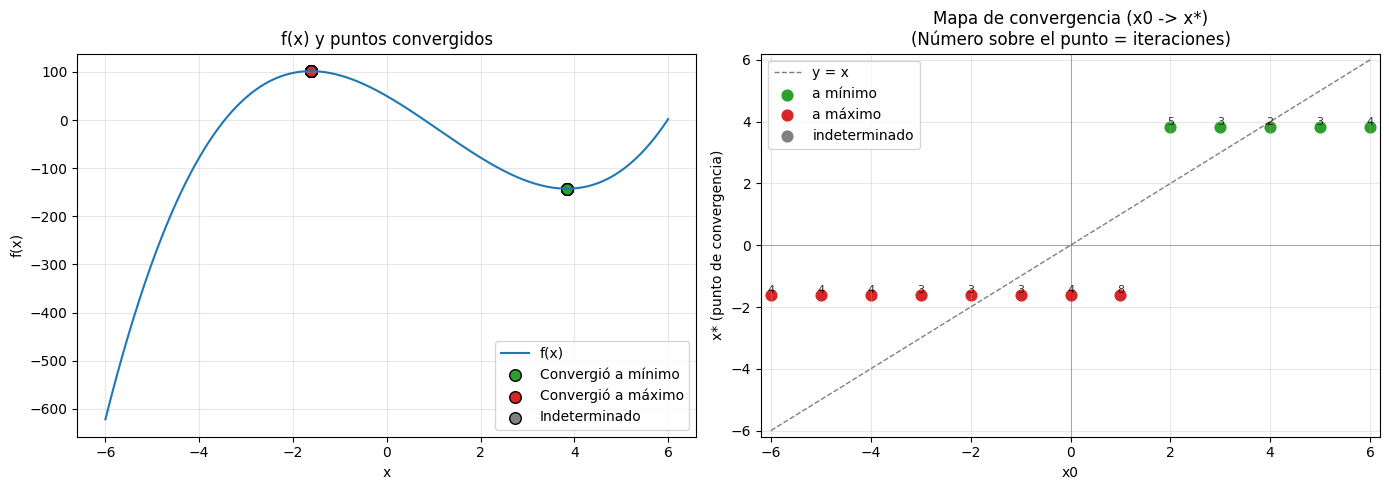

In [10]:
# Visualización de resultados de experimentos NR 1D
# Requiere que la celda de experimentos haya generado 'resultados'

# Preparar datos
x0s = np.array([r[0] for r in resultados], dtype=float)
xstars = np.array([r[1] for r in resultados], dtype=float)
iters = np.array([r[2] for r in resultados], dtype=int)
tipos = [r[3] for r in resultados]
fxstars = np.array([r[4] for r in resultados], dtype=float)

mask_min = np.array([t == "mínimo" for t in tipos])
mask_max = np.array([t == "máximo" for t in tipos])
mask_ind = np.array([t == "indeterminado" for t in tipos])

# Curva de la función para el gráfico (recalcular por claridad)
X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) f(x) con puntos convergidos
ax = axes[0]
ax.plot(X_plot, Y_plot, label='f(x)', color='tab:blue')
ax.scatter(xstars[mask_min], fxstars[mask_min], c='tab:green', edgecolors='k', s=70, label='Convergió a mínimo')
ax.scatter(xstars[mask_max], fxstars[mask_max], c='tab:red', edgecolors='k', s=70, label='Convergió a máximo')
ax.scatter(xstars[mask_ind], fxstars[mask_ind], c='gray', edgecolors='k', s=70, label='Indeterminado')
ax.set_title('f(x) y puntos convergidos')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

# (2) Mapa de convergencia: x0 -> x*
ax2 = axes[1]
ax2.axhline(0, color='k', linewidth=0.4, alpha=0.5)
ax2.axvline(0, color='k', linewidth=0.4, alpha=0.5)
ax2.plot([-6, 6], [-6, 6], 'k--', linewidth=1, alpha=0.5, label='y = x')
ax2.scatter(x0s[mask_min], xstars[mask_min], c='tab:green', s=60, label='a mínimo')
ax2.scatter(x0s[mask_max], xstars[mask_max], c='tab:red', s=60, label='a máximo')
ax2.scatter(x0s[mask_ind], xstars[mask_ind], c='gray', s=60, label='indeterminado')

# Escala de color por iteraciones (opcional: usar tamaño)
for x0, xs, it in zip(x0s, xstars, iters):
    ax2.text(x0, xs, str(it), fontsize=8, ha='center', va='bottom', alpha=0.8)

ax2.set_xlim([-6.2, 6.2])
ax2.set_ylim([-6.2, 6.2])
ax2.set_xlabel('x0')
ax2.set_ylabel('x* (punto de convergencia)')
ax2.set_title('Mapa de convergencia (x0 -> x*)\n(Número sobre el punto = iteraciones)')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

### Utilizar diferentes valores para el factor de convergencia α (por ejemplo, α = 0,6).

Iteración 1: x = -1.8513513513513513
Iteración 2: x = -1.6286660456706072
Iteración 3: x = -1.6196162685302693
Iteración 1: x = -2.081081081081081
Iteración 2: x = -1.7385827972845846
Iteración 3: x = -1.6453846827594298
Iteración 4: x = -1.6248544227846036
Iteración 5: x = -1.6206559372623708
Iteración 6: x = -1.6198123685362884
Iteración 7: x = -1.619643498446553
Iteración 1: x = -2.310810810810811
Iteración 2: x = -1.937971253394685
Iteración 3: x = -1.7569220469018603
Iteración 4: x = -1.6765020486333195
Iteración 5: x = -1.642710020801991
Iteración 6: x = -1.6289029472438414
Iteración 7: x = -1.6233314156266052
Iteración 8: x = -1.621094856433027
Iteración 9: x = -1.620198951176549
Iteración 10: x = -1.6198403833659472
Iteración 1: x = -2.6554054054054053
Iteración 2: x = -2.3873915848278013
Iteración 3: x = -2.182329673817119
Iteración 4: x = -2.0279336043985325
Iteración 5: x = -1.9134013906328349
Iteración 6: x = -1.8295423018322268
Iteración 7: x = -1.7688082299576988
Iteració

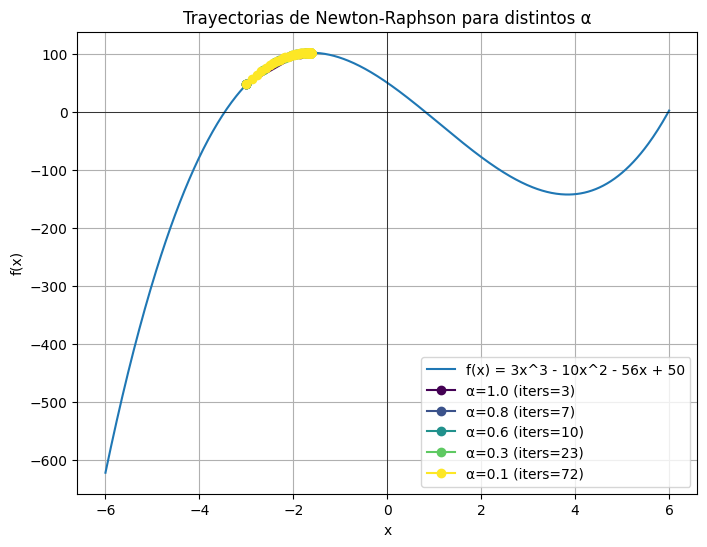

In [13]:
# Probar diferentes valores de α (incluye α = 0.6)
# Esta celda SOLO varía alpha y grafica las trayectorias resultantes.

x0 = -3.0  # punto inicial para todas las pruebas
alpha_values = [1.0, 0.8, 0.6, 0.3, 0.1]

# Curva base de la función
X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)

plt.figure(figsize=(8, 6))
plt.plot(X_plot, Y_plot, label='f(x) = 3x^3 - 10x^2 - 56x + 50', color='tab:blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_values)))

for a, c in zip(alpha_values, colors):
    x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, x0, alpha=a)
    pts = np.array(pts, dtype=float)
    iters = len(pts) - 1
    plt.plot(pts, f_lambdified(pts), '-o', color=c, label=f'α={a} (iters={iters})')

plt.title('Trayectorias de Newton-Raphson para distintos α')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### Graficar la función junto con los puntos encontrados, destacando mínimos y máximos.

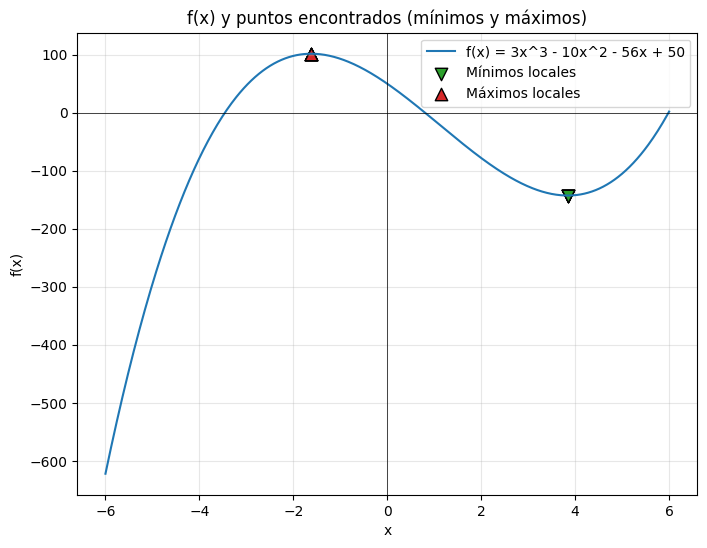

In [14]:
# Graficar f(x) junto con los puntos encontrados, destacando mínimos y máximos
# Esta celda SOLO grafica. Usa 'resultados' si existe; si no, obtiene puntos críticos de f'(x)=0 para trazar.

# 1) Preparar puntos a marcar
puntos = []  # cada elemento: (x_star, f(x_star), tipo)

try:
    _ = resultados  # verificar existencia
    # Deduplicar por x* redondeado y reclasificar con la segunda derivada
    tmp = {}
    for r in resultados:
        xs = float(r[1])
        key = round(xs, 6)
        # Clasificar por segunda derivada en el valor representativo (robusto)
        s2 = float(f_double_prime.subs(x, key))
        tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
        tmp[key] = (key, float(f.subs(x, key)), tipo)
    puntos = list(tmp.values())
except NameError:
    # Fallback: calcular puntos críticos resolviendo f'(x)=0 (sin imprimir)
    crit = sp.solve(sp.Eq(f_prime, 0), x)
    for xi in crit:
        xi_f = float(xi)
        s2 = float(f_double_prime.subs(x, xi_f))
        tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
        puntos.append((xi_f, float(f.subs(x, xi_f)), tipo))

# 2) Curva base de la función
X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)

# 3) Separar por tipo para colorear
xs_min = [px for px, py, tp in puntos if tp == "mínimo"]
ys_min = [py for px, py, tp in puntos if tp == "mínimo"]
xs_max = [px for px, py, tp in puntos if tp == "máximo"]
ys_max = [py for px, py, tp in puntos if tp == "máximo"]
xs_ind = [px for px, py, tp in puntos if tp == "indeterminado"]
ys_ind = [py for px, py, tp in puntos if tp == "indeterminado"]

# 4) Graficar
plt.figure(figsize=(8, 6))
plt.plot(X_plot, Y_plot, label='f(x) = 3x^3 - 10x^2 - 56x + 50', color='tab:blue')

if xs_min:
    plt.scatter(xs_min, ys_min, c='tab:green', marker='v', s=80, edgecolors='k', label='Mínimos locales')
if xs_max:
    plt.scatter(xs_max, ys_max, c='tab:red', marker='^', s=80, edgecolors='k', label='Máximos locales')
if xs_ind:
    plt.scatter(xs_ind, ys_ind, c='gray', marker='o', s=70, edgecolors='k', label='Indeterminados')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('f(x) y puntos encontrados (mínimos y máximos)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Analizar el comportamiento de la convergencia para diferentes valores iniciales.

In [15]:
# Analizar el comportamiento de la convergencia para diferentes valores iniciales
# Esta celda SOLO realiza análisis textual (sin gráficas) para múltiples x0.
# Requiere que ya existan: f, f_prime, f_double_prime, newton_raphson_1d, x (de SymPy).

import numpy as np
import contextlib, io
from collections import defaultdict, Counter

# Rango y resolución de valores iniciales
alpha_eval = 1.0
x0_values = np.linspace(-6, 6, 61)  # paso de 0.2 para buena cobertura

# Ejecutar NR para cada x0 (silenciando los prints internos del método)
resultados_x0 = []  # (x0, x_star, iters, tipo)
for x0 in x0_values:
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, float(x0), alpha=alpha_eval)
    iters = len(pts) - 1
    # Clasificación por segunda derivada
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    resultados_x0.append((float(x0), float(x_star), int(iters), tipo))

# Resumen por tipo
tipos = [t for (_, _, _, t) in resultados_x0]
count_by_type = Counter(tipos)

print("Resumen por tipo de convergencia (x0 en [-6, 6], paso=0.2):")
for k in ["mínimo", "máximo", "indeterminado"]:
    print(f"  {k}: {count_by_type.get(k, 0)}")

# Agrupar por punto de convergencia (basin of attraction)
round_decimals = 6
basins = defaultdict(lambda: {"x0s": [], "iters": [], "tipos": []})
for x0, xs, it, tp in resultados_x0:
    key = round(xs, round_decimals)
    basins[key]["x0s"].append(x0)
    basins[key]["iters"].append(it)
    basins[key]["tipos"].append(tp)

print("\nBasins de atracción (x* redondeado a", round_decimals, "decimales):")
for xs_key in sorted(basins.keys()):
    info = basins[xs_key]
    x0s_sorted = sorted(info["x0s"])  # puede no ser un intervalo perfecto, pero da una idea
    rango = (x0s_sorted[0], x0s_sorted[-1]) if x0s_sorted else (None, None)
    # Clasificar por segunda derivada en el representante del basin
    s2 = float(f_double_prime.subs(x, xs_key))
    tipo_basin = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    print(
        f"  x* ≈ {xs_key:.6f} -> tipo: {tipo_basin}, ocurrencias: {len(info['x0s'])}, "
        f"iters (min/mean/max): {np.min(info['iters'])}/{np.mean(info['iters']):.2f}/{np.max(info['iters'])}, "
        f"rango aprox x0: [{rango[0]:.1f}, {rango[1]:.1f}]"
    )

# Estadísticas globales de iteraciones
all_iters = np.array([it for (_, _, it, _) in resultados_x0], dtype=int)
print("\nEstadísticas globales de iteraciones:")
print(f"  min: {all_iters.min()}  mean: {all_iters.mean():.2f}  median: {np.median(all_iters):.2f}  max: {all_iters.max()}")

# (Opcional) Mostrar algunos mapeos ejemplo x0 -> x* para inspección
print("\nMuestras (x0 -> x* ; iters ; tipo):")
for x0, xs, it, tp in resultados_x0[::10]:  # cada 10 muestras para no saturar la salida
    print(f"  {x0:6.2f} -> {xs: .6f} ; {it:2d} iters ; {tp}")

Resumen por tipo de convergencia (x0 en [-6, 6], paso=0.2):
  mínimo: 25
  máximo: 36
  indeterminado: 0

Basins de atracción (x* redondeado a 6 decimales):
  x* ≈ -1.619618 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 2/2.00/2, rango aprox x0: [-1.4, -1.4]
  x* ≈ -1.619616 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 3/3.00/3, rango aprox x0: [-3.0, -3.0]
  x* ≈ -1.619614 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 4/4.00/4, rango aprox x0: [-6.0, -6.0]
  x* ≈ -1.619610 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 4/4.00/4, rango aprox x0: [-5.8, -5.8]
  x* ≈ -1.619607 -> tipo: máximo, ocurrencias: 4, iters (min/mean/max): 2/3.25/4, rango aprox x0: [-5.6, 0.0]
  x* ≈ -1.619606 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 3/3.00/3, rango aprox x0: [-0.8, -0.8]
  x* ≈ -1.619605 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 4/4.00/4, rango aprox x0: [-5.4, -5.4]
  x* ≈ -1.619604 -> tipo: máximo, ocurrencias: 1, iters (min/mean/m

# Problema 2




Diseñe un programa que halle y muestre gráficamente todos los mínimos y máximos locales de una función para luego determinar el minino y máximo global de la misma dentro del rango de la figura (entre -3 y 3). Use los métodos de Newton Raphson o los Gradientes para realizar lo solicitado.

La función a implementar es:  
$$
y = x^5 - 8x^3 + 10x + 6
$$

In [16]:
# Definición de f(x) para Problema 2 y derivadas analíticas
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variable simbólica y función del problema 2
x = sp.symbols('x')
f = x**5 - 8*x**3 + 10*x + 6
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

print("f'(x) =", f_prime)
print("f''(x) =", f_double_prime)

f'(x) = 5*x**4 - 24*x**2 + 10
f''(x) = 20*x**3 - 48*x


In [17]:
# Newton–Raphson desde múltiples puntos iniciales para hallar extremos locales
# Usaremos la implementación robusta newton_raphson_1d definida previamente.

# Rango de búsqueda en el intervalo solicitado [-3, 3]
x0_values = np.linspace(-3, 3, 13)  # -3, -2.5, ..., 2.5, 3.0

extremos = []  # (x0, x_star, iters, tipo)
for x0 in x0_values:
    x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, float(x0), alpha=1.0, tol=1e-6, max_iter=200)
    iters = len(pts) - 1
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    extremos.append((float(x0), float(x_star), int(iters), tipo))

# Deduplicar puntos encontrados por x* (redondeo)
round_decimals = 6
puntos_unicos = {}
for x0, xs, it, tp in extremos:
    key = round(xs, round_decimals)
    # Mantener el mejor (menos iteraciones) para el mismo xs redondeado
    if key not in puntos_unicos or it < puntos_unicos[key]["iters"]:
        puntos_unicos[key] = {"x_star": key, "iters": it, "tipo": tp}

print("Puntos candidatos a extremos (únicos por x* redondeado):")
for k, v in sorted(puntos_unicos.items()):
    print(f"  x* ≈ {k:.6f} ; tipo: {v['tipo']} ; iters: {v['iters']}")

# Exportar a listas para pasos siguientes
criticos_x = np.array([v["x_star"] for v in puntos_unicos.values()], dtype=float)
criticos_tipo = [v["tipo"] for v in puntos_unicos.values()]

Iteración 1: x = -2.4974747474747474
Iteración 2: x = -2.2114313203806697
Iteración 3: x = -2.10057007392738
Iteración 4: x = -2.083434983476047
Iteración 5: x = -2.083044113731595
Iteración 6: x = -2.0830439128752793
Iteración 1: x = -2.2126623376623376
Iteración 2: x = -2.1008752076058768
Iteración 3: x = -2.083448498910989
Iteración 4: x = -2.0830441278493725
Iteración 5: x = -2.0830439128752865
Iteración 1: x = -2.09375
Iteración 2: x = -2.083191640773439
Iteración 3: x = -2.0830439415496738
Iteración 4: x = -2.083043912875227
Iteración 1: x = 2.6527777777777777
Iteración 2: x = 2.2921745375549194
Iteración 3: x = 2.124577733179674
Iteración 4: x = 2.0851499890827685
Iteración 5: x = 2.0830497198960245
Iteración 6: x = 2.083043912919545
Iteración 1: x = -0.6785714285714286
Iteración 2: x = -0.678916872445483
Iteración 3: x = -0.6789168263001512
Iteración 1: x = -0.7005813953488372
Iteración 2: x = -0.6790848547674959
Iteración 3: x = -0.6789168372016715
Hessiano nulo; se detiene la

In [18]:
# Clasificar extremos locales y determinar extremos globales en [-3, 3]

# Clasificación local por segunda derivada (ya almacenada en 'criticos_tipo')
local_min = [xv for xv, tp in zip(criticos_x, criticos_tipo) if tp == "mínimo"]
local_max = [xv for xv, tp in zip(criticos_x, criticos_tipo) if tp == "máximo"]

# Evaluar f en los candidatos y en los extremos del intervalo
f_l = sp.lambdify(x, f, 'numpy')

candidatos = list(criticos_x) + [-3.0, 3.0]
vals = [float(f_l(c)) for c in candidatos]
idx_max = int(np.argmax(vals))
idx_min = int(np.argmin(vals))

x_global_max = candidatos[idx_max]
x_global_min = candidatos[idx_min]

print("Máximos locales:", local_max)
print("Mínimos locales:", local_min)
print(f"Máximo global (en [-3,3]) en x = {x_global_max:.6f}, f(x) = {f_l(x_global_max):.6f}")
print(f"Mínimo global (en [-3,3]) en x = {x_global_min:.6f}, f(x) = {f_l(x_global_min):.6f}")

Máximos locales: [np.float64(-2.083044), np.float64(0.678917)]
Mínimos locales: [np.float64(2.083044), np.float64(-0.678917)]
Máximo global (en [-3,3]) en x = 3.000000, f(x) = 63.000000
Mínimo global (en [-3,3]) en x = -3.000000, f(x) = -51.000000


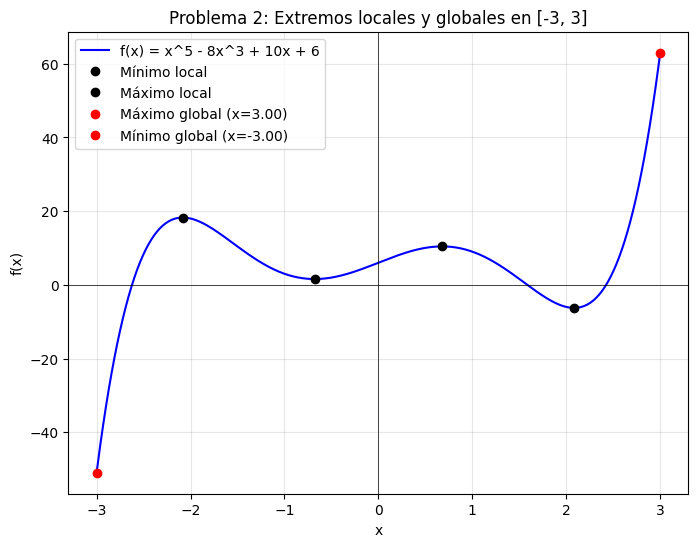

In [19]:
# Graficar f(x) con los extremos locales (negro) y extremos globales (rojo)

X = np.linspace(-3, 3, 600)
f_l = sp.lambdify(x, f, 'numpy')
Y = f_l(X)

plt.figure(figsize=(8, 6))
plt.plot(X, Y, color='blue', label='f(x) = x^5 - 8x^3 + 10x + 6')

# Locales en negro
for xv in local_min:
    plt.plot(xv, f_l(xv), 'ko', label='Mínimo local' if 'Mínimo local' not in plt.gca().get_legend_handles_labels()[1] else '')
for xv in local_max:
    plt.plot(xv, f_l(xv), 'ko', label='Máximo local' if 'Máximo local' not in plt.gca().get_legend_handles_labels()[1] else '')

# Globales en rojo
plt.plot(x_global_max, f_l(x_global_max), 'ro', label=f"Máximo global (x={x_global_max:.2f})")
plt.plot(x_global_min, f_l(x_global_min), 'ro', label=f"Mínimo global (x={x_global_min:.2f})")

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Problema 2: Extremos locales y globales en [-3, 3]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [ ]:
# Análisis de convergencia del método para Problema 2 (solo texto)
# Barrido de x0 en [-3,3] con paso fino; agrupar por x* y resumir iteraciones.

from collections import defaultdict, Counter
import contextlib, io

alpha_eval = 1.0
x0_values = np.linspace(-3, 3, 61)  # paso 0.1

resultados_conv = []  # (x0, x_star, iters, tipo)
for x0 in x0_values:
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, float(x0), alpha=alpha_eval, tol=1e-6, max_iter=200)
    iters = len(pts) - 1
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    resultados_conv.append((float(x0), float(x_star), int(iters), tipo))

# Resumen por tipo
tipos = [t for (_, _, _, t) in resultados_conv]
count_by_type = Counter(tipos)
print("Resumen por tipo:")
for k in ["mínimo", "máximo", "indeterminado"]:
    print(f"  {k}: {count_by_type.get(k, 0)}")

# Basins de atracción por x*
round_decimals = 6
basins = defaultdict(lambda: {"x0s": [], "iters": [], "tipo": None})
for x0, xs, it, tp in resultados_conv:
    key = round(xs, round_decimals)
    basins[key]["x0s"].append(x0)
    basins[key]["iters"].append(it)
    basins[key]["tipo"] = tp

print("\nBasins de atracción (x* redondeado a", round_decimals, "decimales):")
for xs_key in sorted(basins.keys()):
    info = basins[xs_key]
    x0s_sorted = sorted(info["x0s"])
    rango = (x0s_sorted[0], x0s_sorted[-1]) if x0s_sorted else (None, None)
    print(
        f"  x* ≈ {xs_key:.6f} -> tipo: {info['tipo']}, ocurrencias: {len(info['x0s'])}, "
        f"iters (min/mean/max): {np.min(info['iters'])}/{np.mean(info['iters']):.2f}/{np.max(info['iters'])}, "
        f"rango aprox x0: [{rango[0]:.1f}, {rango[1]:.1f}]"
    )

all_iters = np.array([it for (_, _, it, _) in resultados_conv], dtype=int)
print("\nEstadísticas globales de iteraciones:")
print(f"  min: {all_iters.min()}  mean: {all_iters.mean():.2f}  median: {np.median(all_iters):.2f}  max: {all_iters.max()}")

print("\nMuestras (x0 -> x* ; iters ; tipo):")
for x0, xs, it, tp in resultados_conv[::10]:
    print(f"  {x0:6.2f} -> {xs: .6f} ; {it:2d} iters ; {tp}")

# Problema 3

La superficie z definida como: 
$$
f(x,y)=(x−1)^2+100(y−x^2)^2
$$

### Parte A: Newton–Raphson 2D (Rosenbrock)

Objetivos:
- Calcular analíticamente ∇f(x,y) y Hf(x,y) para f(x,y)=(x−1)^2+100(y−x^2)^2.
- Implementar el método de Newton–Raphson en 2D.
- Usar (x0,y0)=(0,10) y mostrar la trayectoria.
- Graficar la superficie z=f(x,y) y resaltar el mínimo final en rojo.
- Analizar la convergencia hacia el mínimo conocido (1,1).

In [20]:
# 1) Gradiente y Hessiano analíticos con SymPy
import sympy as sp
import numpy as np

x_sym, y_sym = sp.symbols('x_sym y_sym')
f_sym = (x_sym - 1)**2 + 100*(y_sym - x_sym**2)**2

# Gradiente (vector 2x1) y Hessiano (matriz 2x2)
grad_sym = sp.Matrix([sp.diff(f_sym, x_sym), sp.diff(f_sym, y_sym)])
hess_sym = sp.hessian(f_sym, (x_sym, y_sym))

print("∇f(x,y) =", grad_sym)
print("Hf(x,y) =")
sp.pprint(hess_sym)

# Versiones numéricas (lambdify)
grad_fn = sp.lambdify((x_sym, y_sym), grad_sym, 'numpy')
hess_fn = sp.lambdify((x_sym, y_sym), hess_sym, 'numpy')

∇f(x,y) = Matrix([[-400*x_sym*(-x_sym**2 + y_sym) + 2*x_sym - 2], [-200*x_sym**2 + 200*y_sym]])
Hf(x,y) =
⎡          2                            ⎤
⎢1200⋅x_sym  - 400⋅y_sym + 2  -400⋅x_sym⎥
⎢                                       ⎥
⎣        -400⋅x_sym              200    ⎦


In [21]:
# 2) Newton–Raphson 2D con grad_fn y hess_fn

def newton_raphson_2d(x0, y0, alpha=1.0, tol=1e-8, max_iter=200):
    xi, yi = float(x0), float(y0)
    path = [(xi, yi)]
    for i in range(1, max_iter + 1):
        g = np.array(grad_fn(xi, yi), dtype=float).reshape(2)
        H = np.array(hess_fn(xi, yi), dtype=float)
        # Criterio de paro por gradiente pequeño
        if np.linalg.norm(g, ord=2) < tol:
            return xi, yi, path, i-1
        # Resolver H * delta = g (paso de Newton)
        try:
            delta = np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            print("Hessiano singular o mal condicionado; deteniendo.")
            break
        xi = xi - alpha * delta[0]
        yi = yi - alpha * delta[1]
        path.append((xi, yi))
        # Criterio de paso pequeño
        if np.linalg.norm(delta, ord=2) < tol:
            return xi, yi, path, i
    return xi, yi, path, max_iter

In [22]:
# 3) Ejecutar con (x0, y0) = (0, 10)

alpha = 1.0
x0, y0 = 0.0, 10.0
x_min, y_min, path, iters = newton_raphson_2d(x0, y0, alpha=alpha)

print(f"Alpha = {alpha}")
print(f"Iteraciones = {iters}")
print(f"Mínimo encontrado en x = {x_min:.8f}, y = {y_min:.8f}")

Alpha = 1.0
Iteraciones = 5
Mínimo encontrado en x = 1.00000000, y = 1.00000000


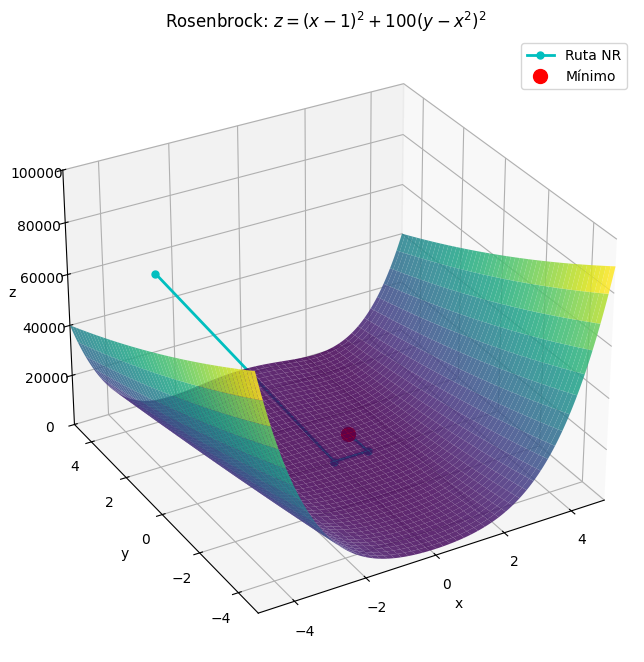

In [23]:
# 4) Superficie 3D y 5) Trayectoria con mínimo final en rojo

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Malla para la superficie
x_vals = np.linspace(-5, 5, 300)
y_vals = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 1)**2 + 100*(Y - X**2)**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.85, edgecolor='none')

# Convertir trayectoria a arrays y graficar sobre la superficie
path_np = np.array(path)
Z_path = (path_np[:,0] - 1)**2 + 100*(path_np[:,1] - path_np[:,0]**2)**2
ax.plot(path_np[:,0], path_np[:,1], Z_path, 'c-', marker='o', label='Ruta NR', linewidth=2, markersize=5)

# Punto mínimo final en rojo
z_min = (x_min - 1)**2 + 100*(y_min - x_min**2)**2
ax.plot([x_min], [y_min], [z_min], 'ro', markersize=10, label='Mínimo')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 100000])
ax.view_init(elev=30, azim=240)
ax.set_title(r'Rosenbrock: $z=(x-1)^2 + 100(y-x^2)^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

In [24]:
# 6) Análisis de convergencia hacia (1,1)

x_star, y_star = x_min, y_min
g_norm = np.linalg.norm(np.array(grad_fn(x_star, y_star), dtype=float).reshape(2))
err = np.hypot(x_star - 1.0, y_star - 1.0)

print(f"Punto final: ({x_star:.8f}, {y_star:.8f})")
print(f"||∇f(x*,y*)|| = {g_norm:.3e}")
print(f"Distancia a (1,1): {err:.3e}")
print(f"Convergencia lograda: {'sí' if err < 1e-6 and g_norm < 1e-6 else 'parcial'}")

Punto final: (1.00000000, 1.00000000)
||∇f(x*,y*)|| = 7.671e-14
Distancia a (1,1): 4.191e-14
Convergencia lograda: sí


### Resumen de convergencia de NR 1D

Puntos de convergencia únicos (redondeo a 6 decimales):
  x* = -1.619616 -> tipo: máximo, ocurrencias: 1, iters promedio: 3.00
  x* = -1.619614 -> tipo: máximo, ocurrencias: 1, iters promedio: 4.00
  x* = -1.619607 -> tipo: máximo, ocurrencias: 1, iters promedio: 4.00
  x* = -1.619602 -> tipo: máximo, ocurrencias: 2, iters promedio: 3.50
  x* = -1.619601 -> tipo: máximo, ocurrencias: 3, iters promedio: 5.00
  x* = 3.841823 -> tipo: mínimo, ocurrencias: 1, iters promedio: 5.00
  x* = 3.841824 -> tipo: mínimo, ocurrencias: 1, iters promedio: 4.00
  x* = 3.841827 -> tipo: mínimo, ocurrencias: 1, iters promedio: 2.00
  x* = 3.841828 -> tipo: mínimo, ocurrencias: 1, iters promedio: 3.00
  x* = 3.841830 -> tipo: mínimo, ocurrencias: 1, iters promedio: 3.00

Conteo por tipo:
  mínimo: 5
  máximo: 8
  indeterminado: 0


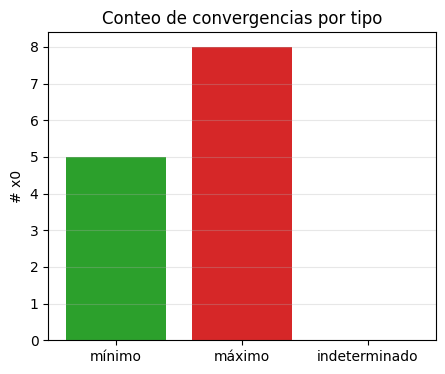

In [11]:
# Consolidar resultados de convergencia
# Requiere 'resultados' desde la celda de experimentos

import math

# Datos desde 'resultados': (x0, x_star, iters, tipo, f(x*))
x0s = np.array([r[0] for r in resultados], dtype=float)
xstars = np.array([r[1] for r in resultados], dtype=float)
iters = np.array([r[2] for r in resultados], dtype=int)
tipos = [r[3] for r in resultados]

# Agrupar puntos de convergencia únicos por redondeo
round_decimals = 6
uniq_vals = {}
for x0, xs, it, tp in zip(x0s, xstars, iters, tipos):
    key = round(float(xs), round_decimals)
    if key not in uniq_vals:
        uniq_vals[key] = {"count": 0, "iters": [], "tipos": []}
    uniq_vals[key]["count"] += 1
    uniq_vals[key]["iters"].append(int(it))
    uniq_vals[key]["tipos"].append(tp)

print("Puntos de convergencia únicos (redondeo a", round_decimals, "decimales):")
for xs_key, info in sorted(uniq_vals.items(), key=lambda kv: kv[0]):
    # Clasificación por segunda derivada en el valor representativo
    s2 = float(f_double_prime.subs(x, xs_key))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    print(f"  x* = {xs_key:.6f} -> tipo: {tipo}, ocurrencias: {info['count']}, iters promedio: {np.mean(info['iters']):.2f}")

# Resumen por tipo
from collections import Counter
count_by_type = Counter(tipos)
print("\nConteo por tipo:")
for k in ["mínimo", "máximo", "indeterminado"]:
    print(f"  {k}: {count_by_type.get(k, 0)}")

# Gráfico de barras por tipo
plt.figure(figsize=(5, 4))
labels = ["mínimo", "máximo", "indeterminado"]
values = [count_by_type.get(k, 0) for k in labels]
plt.bar(labels, values, color=["tab:green", "tab:red", "gray"])
plt.title("Conteo de convergencias por tipo")
plt.ylabel("# x0")
plt.grid(axis='y', alpha=0.3)
plt.show()

### Trayectoria de Newton–Raphson para un x0 específico

Iteración 1: x = -2.96875
Iteración 2: x = -1.8426728723404255
Iteración 3: x = -1.6280245255855108
Iteración 4: x = -1.6196142241481963


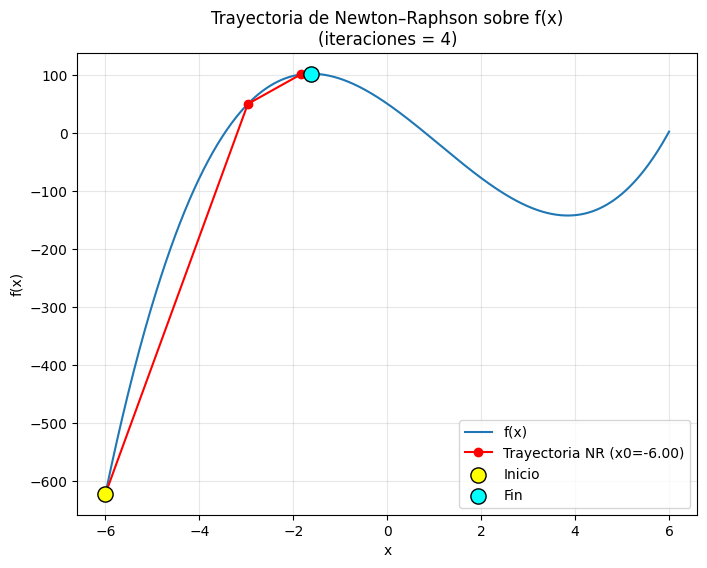

In [12]:
# Seleccione el valor inicial aquí
x0_selected = -6.0  # cambie este valor para ver otra trayectoria
alpha_selected = 1.0

x_star_sel, traj = newton_raphson_1d(f, f_prime, f_double_prime, x0_selected, alpha=alpha_selected)
traj = np.array(traj, dtype=float)

# Curva de la función
X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)

plt.figure(figsize=(8, 6))
plt.plot(X_plot, Y_plot, label='f(x)', color='tab:blue')

# Trayectoria sobre f(x)
plt.plot(traj, f_lambdified(traj), 'ro-', label='Trayectoria NR (x0={:.2f})'.format(x0_selected))

# Anotaciones de inicio y fin
plt.scatter([traj[0]], [f_lambdified(traj[0])], c='yellow', edgecolors='k', s=120, zorder=3, label='Inicio')
plt.scatter([traj[-1]], [f_lambdified(traj[-1])], c='cyan', edgecolors='k', s=120, zorder=3, label='Fin')

plt.title('Trayectoria de Newton–Raphson sobre f(x)\n(iteraciones = {})'.format(len(traj)-1))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()